In [1]:
#Required Packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Reading in dataset
df = pd.read_excel('Car details v3.xlsx')

# Data Cleaning and EDA

In [3]:
print(df.shape)
print(df.head())
print(df.info()) #Missing values for mileage, engine, max_power, torque, and seats

(8128, 13)
                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1

In [4]:
# Missing values
print(df.isnull().sum())

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64


In [5]:
#Dropping missing values
df = df.dropna()
print(df.isnull().sum())

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64


In [6]:
#Obtaining just the car manufacturer name
df['name'] = df['name'].str.split().apply(lambda x: x[0])

In [7]:
#Changing name of car to its origin
df['origin'] = df['name'].replace(['Maruti','Skoda','Honda','Hyundai','Toyota','Ford','Renault','Mahindra','Tata','Chevrolet',
'Datsun','Jeep','Mercedes-Benz','Mitsubishi','Audi','Volkswagen','BMW','Nissan','Lexus','Jaguar','Land','MG','Volvo','Daewoo',
'Kia','Fiat','Force','Ambassador','Ashok','Isuzu','Opel'],['Asia','Europe','Asia','Asia','Asia','North America','Europe','Asia',
                                                          'Asia','North America','Asia','North America','Europe','Asia','Europe',
                                                          'Europe','Europe','Asia','Asia','Europe','Europe','Europe','Europe','Asia',
                                                          'Asia','Europe','Asia','Asia','Asia','Asia','Europe'])

Diesel    4299
Petrol    3520
CNG         52
LPG         35
Name: fuel, dtype: int64


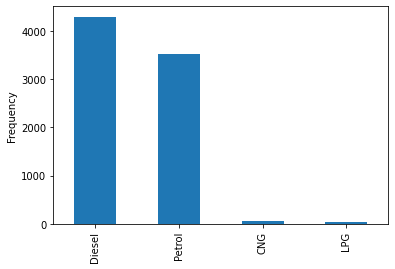

In [8]:
#Seeing unique values for fuel
print(df['fuel'].value_counts())
df['fuel'].value_counts().plot(kind='bar')
plt.ylabel('Frequency')
plt.show()

In [9]:
#Dropping rows where fuel equals 'CNG' or 'LPG' (Reduce complexity of variable)
df = df[(df['fuel'] != 'CNG') & (df['fuel'] != 'LPG')]
print(df['fuel'].value_counts())

Diesel    4299
Petrol    3520
Name: fuel, dtype: int64


In [10]:
#Determining if mileage units are the same for all values in dataset
print(df['mileage'].head())
df['mileage_units'] = df['mileage'].apply(lambda x: str(x)).str.split().apply(lambda x: x[1]) 
print(df['mileage_units'].value_counts()) #kmpl is the only unit
df['mileage'] = df['mileage'].apply(lambda x: str(x)).str.split().apply(lambda x: x[0]).apply(lambda x: float(x)) #Removing 'kmpl' unit from mileage column
df.drop('mileage_units',axis=1,inplace=True) #Dropping mileage units

0     23.4 kmpl
1    21.14 kmpl
2     17.7 kmpl
3     23.0 kmpl
4     16.1 kmpl
Name: mileage, dtype: object
kmpl    7819
Name: mileage_units, dtype: int64


In [11]:
#Removing 'CC' unit from engine column
print(df['engine'].head())
df['engine_units'] = df['engine'].apply(lambda x: str(x)).str.split().apply(lambda x: x[1])
print(df['engine_units'].value_counts()) # CC is the only engine unit
df['engine'] = df['engine'].apply(lambda x: str(x)).str.split().apply(lambda x: x[0]).apply(lambda x: int(x))
df.drop('engine_units',axis=1,inplace=True)

0    1248 CC
1    1498 CC
2    1497 CC
3    1396 CC
4    1298 CC
Name: engine, dtype: object
CC    7819
Name: engine_units, dtype: int64


In [12]:
#Removing 'bhp' unit from max_power column
print(df['max_power'].head())
df['max_power_units'] = df['max_power'].apply(lambda x: str(x)).str.split().apply(lambda x: x[1])
print(df['max_power_units'].value_counts()) #bhp is the only max power unit
df['max_power'] = df['max_power'].apply(lambda x: str(x)).str.split().apply(lambda x: x[0]).apply(lambda x: float(x))
df.drop('max_power_units',axis=1,inplace=True)

0        74 bhp
1    103.52 bhp
2        78 bhp
3        90 bhp
4      88.2 bhp
Name: max_power, dtype: object
bhp    7819
Name: max_power_units, dtype: int64


In [13]:
#Dropping torque (units were difficult to clean)
df.drop('torque',axis=1,inplace=True)

In [14]:
#General statistics for numeric variables
df[['year', 'km_driven', 'mileage','engine','max_power', 'seats', 'selling_price']].describe()

,year,km_driven,mileage,engine,max_power,seats,selling_price
count,7819.000000,7.819000e+03,7819.000000,7819.000000,7819.000000,7819.000000,7.819000e+03
mean,2013.990280,6.912583e+04,19.390375,1463.090677,91.935226,5.421281,6.539858e+05
std,3.865268,5.687384e+04,4.001777,504.655439,35.770104,0.962876,8.170529e+05
min,1994.000000,1.000000e+03,0.000000,624.000000,34.200000,2.000000,2.999900e+04
25%,2012.000000,3.400000e+04,16.780000,1197.000000,69.000000,5.000000,2.700000e+05
50%,2015.000000,6.000000e+04,19.300000,1248.000000,82.400000,5.000000,4.550000e+05
75%,2017.000000,9.600000e+04,22.320000,1582.000000,102.000000,5.000000,6.950000e+05
max,2020.000000,2.360457e+06,42.000000,3604.000000,400.000000,14.000000,1.000000e+07


In [15]:
#Dropping cars with unreasonably high km_driven (804672km = 500000 miles)
print(df[df['km_driven']>= 804672])
sus_km = df[df['km_driven']>= 804672].index
df.drop(sus_km, axis=0, inplace=True)

          name  year  selling_price  km_driven    fuel seller_type  \
1810  Mahindra  2012         500000    1500000  Diesel  Individual   
3486   Hyundai  2007         550000    2360457  Petrol  Individual   

     transmission         owner  mileage  engine  max_power  seats origin  
1810       Manual   First Owner     15.1    2179     140.00    7.0   Asia  
3486       Manual  Second Owner     18.6    1197      81.83    5.0   Asia  


In [16]:
# Determining suspicious mileage for diesel cars (59mpg = 25.0835 kmpl).
# I found a source that explains how diesel cars have high mileage so I didn't remove any values.
print(df['mileage'][(df['mileage']>=25.0835) & (df['fuel'] == 'Diesel')].describe())
print(df[(df['mileage']>=25.0835) & (df['fuel'] == 'Diesel')])

count    603.000000
mean      26.534511
std        1.173290
min       25.100000
25%       25.440000
50%       26.210000
75%       27.390000
max       28.400000
Name: mileage, dtype: float64
         name  year  selling_price  km_driven    fuel seller_type  \
21      Honda  2017         950000      50000  Diesel  Individual   
22     Maruti  2015         525000      40000  Diesel  Individual   
52      Honda  2015         600000      54700  Diesel      Dealer   
54      Honda  2015         525000      63000  Diesel      Dealer   
64     Maruti  2015         630000     147000  Diesel  Individual   
...       ...   ...            ...        ...     ...         ...   
8040  Hyundai  2018         680000      26000  Diesel  Individual   
8046    Honda  2017         525000      37151  Diesel      Dealer   
8070    Honda  2015         409999      60000  Diesel  Individual   
8075   Maruti  2014         560000      90000  Diesel  Individual   
8117   Maruti  2015         625000      50000  Dies

In [17]:
# Determining suspicious mileage for petrol cars
# I found a source that some petrol cars have high mileage so I decided not to remove any values.
print(df['mileage'][(df['mileage']>=25.0835) & (df['fuel'] == 'Petrol')].describe())
print(df[(df['mileage']>=25.0835) & (df['fuel'] == 'Petrol')])

count    85.000000
mean     25.471529
std       1.829099
min      25.170000
25%      25.170000
50%      25.170000
75%      25.170000
max      42.000000
Name: mileage, dtype: float64
         name  year  selling_price  km_driven    fuel seller_type  \
170     Volvo  2017       10000000      30000  Petrol  Individual   
221   Renault  2018         335000      30000  Petrol  Individual   
237   Renault  2016         270000      44000  Petrol  Individual   
317   Renault  2016         229999      40000  Petrol  Individual   
363      Tata  2012          64000      18000  Petrol      Dealer   
...       ...   ...            ...        ...     ...         ...   
7833     Tata  2012          45000      28000  Petrol  Individual   
7848  Renault  2019         290000      21000  Petrol  Individual   
7850  Renault  2016         250000      22000  Petrol  Individual   
7911  Renault  2017         320000      28000  Petrol  Individual   
8089     Tata  2011          46000      25000  Petrol  Indi

In [18]:
#Suspicious mileage value for petrol car with suspicious selling price
#Found a source that confirmed this car (index 170) did not have such high mileage
print(df[(df['mileage']>=26) & (df['fuel']=='Petrol')])
df.drop(170,axis=0,inplace=True)

       name  year  selling_price  km_driven    fuel seller_type transmission  \
170   Volvo  2017       10000000      30000  Petrol  Individual    Automatic   
709    Tata  2011          45000      10000  Petrol  Individual       Manual   
1267   Tata  2010          55000      50000  Petrol  Individual       Manual   
2770   Tata  2009          70000      15000  Petrol  Individual       Manual   
5878   Tata  2011          70000      40000  Petrol  Individual       Manual   
6738   Tata  2010          45000      30400  Petrol  Individual       Manual   
7624   Tata  2011          70000      80000  Petrol  Individual       Manual   
8089   Tata  2011          46000      25000  Petrol  Individual       Manual   

                     owner  mileage  engine  max_power  seats  origin  
170            First Owner     42.0    1969      400.0    4.0  Europe  
709            Third Owner     26.0     624       35.0    4.0    Asia  
1267           Third Owner     26.0     624       35.0    4.0  

In [19]:
#Determing values with suspicious max_power bhp
#Found a source with cars that can go up to 400bhp
print(df['max_power'].describe())

count    7816.000000
mean       91.890955
std        35.602487
min        34.200000
25%        69.000000
50%        82.400000
75%       102.000000
max       282.000000
Name: max_power, dtype: float64


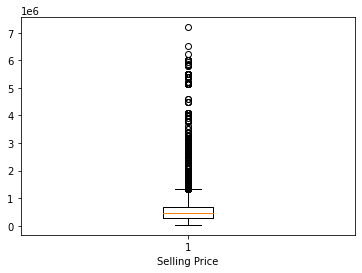

count    7.816000e+03
mean     6.528231e+05
std      8.103388e+05
min      2.999900e+04
25%      2.700000e+05
50%      4.550000e+05
75%      6.950000e+05
max      7.200000e+06
Name: selling_price, dtype: float64
               name  year  selling_price  km_driven    fuel seller_type  \
132           Lexus  2019        5150000      20000  Petrol      Dealer   
136   Mercedes-Benz  2017        6000000      37000  Diesel      Dealer   
139             BMW  2019        5800000       7500  Diesel      Dealer   
148   Mercedes-Benz  2017        5850000      47000  Diesel      Dealer   
288   Mercedes-Benz  2018        4600000       7976  Diesel  Individual   
...             ...   ...            ...        ...     ...         ...   
7757            BMW  2019        5200000      10000  Diesel      Dealer   
7859          Lexus  2019        5150000      20000  Petrol      Dealer   
7872            BMW  2019        5400000       7500  Diesel      Dealer   
7873            BMW  2019        55000

In [20]:
#Determining suspicious selling price
#Found a source that explains why cars are generally sold at a higher price in India compared to the U.S.
plt.boxplot(df['selling_price'])
plt.xlabel('Selling Price')
plt.show()
print(df['selling_price'].describe())
print(df[df['selling_price']>=4558047.88]) #(4558047.88 rupees = 59785.45 U.S. dollars)

In [ ]:
#Correlation Heatmap (which features have a strong linear relationship with selling_price)
corr_matrix = df.corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [ ]:
#Pairplot Linearity test
sns.pairplot(df)
plt.show()

In [ ]:
#Relationship between features and response with fuel as category
for i in ['year','km_driven','mileage','engine','max_power','seats']:
    plt.figure()
    plt.scatter(df[i],df['selling_price'],c=df['fuel'].map({'Diesel':'blue','Petrol':'orange'}))
    plt.title(i)
    plt.show()

In [ ]:
#Relationship between features and response with origin as category
for i in ['year','km_driven','mileage','engine','max_power','seats']:
    plt.figure()
    plt.scatter(df[i],df['selling_price'],c=df['origin'].map({'Asia':'blue','Europe':'green','North America':'red'}))
    plt.title(i)
    plt.show()

In [ ]:
#Relationship between features and response with transmission as category
for i in ['year','km_driven','mileage','engine','max_power','seats']:
    plt.figure()
    plt.scatter(df[i],df['selling_price'],c=df['transmission'].map({'Automatic':'blue','Manual':'orange'}))
    plt.title(i)
    plt.show()

In [ ]:
#Relationship between features and response with seller_type as category
for i in ['year','km_driven','mileage','engine','max_power','seats']:
    plt.figure()
    plt.scatter(df[i],df['selling_price'],c=df['seller_type'].map({'Individual':'blue','Dealer':'green','Trustmark Dealer':'red'}))
    plt.title(i)
    plt.show()

In [21]:
#Dropping features that won't be used
df.drop('name',axis=1,inplace=True)
df.drop('owner',axis=1,inplace=True)

In [24]:
#Creating excel file of cleaned dataset
df.to_excel("Car_details_v3_cleaned.xlsx")